<a href="https://colab.research.google.com/github/hiba0903/DSA_CS_Ast/blob/main/DSA_CS_UnsupervisedLearning_Wholesale_CustomerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study On Unsupervised Learning**
 The wholesale customer data is given
 *  Read the dataset to the python environment.
 *  Tryout different clustering models in the wholesale customer
 dataset.
 * Find the optimum number of clusters in each model and create the model
 with the optimum number of clusters




### **Import necessary Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.decomposition import PCA

### **Loading the dataset**

In [3]:
wholesale = pd.read_csv('/content/Wholesale customers data.csv')

### **Understanding the data**

In [4]:
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
wholesale.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### **Checking for any missing values**

In [7]:
wholesale.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


### **Detecting Outliers**

In [10]:
outlier_col=[]

for col in wholesale.columns:
  q1=wholesale[col].quantile(0.25)
  q3=wholesale[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers = wholesale[(wholesale[col] < lower_bound) | (wholesale[col] > upper_bound)][col]
  print(f"Number of outliers in {col}: {len(outliers)}")
  count=outliers.shape[0]

  if count>0:
    outlier_col.append(col)
print(outlier_col)


Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 20
Number of outliers in Milk: 28
Number of outliers in Grocery: 24
Number of outliers in Frozen: 43
Number of outliers in Detergents_Paper: 30
Number of outliers in Delicassen: 27
['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


### **Handling Outlier By IQR method**

In [11]:
for column in outlier_col:
  q1=wholesale[column].quantile(0.25)
  q3=wholesale[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  wholesale[column]=wholesale[column].clip(lower=lower_bound,upper=upper_bound)


### **Checking whether outlier is handled succesfully**

In [12]:
outlier_col=[]

for col in wholesale.columns:
  q1=wholesale[col].quantile(0.25)
  q3=wholesale[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers = wholesale[(wholesale[col] < lower_bound) | (wholesale[col] > upper_bound)][col]
  print(f"Number of outliers in {col}: {len(outliers)}")
  count=outliers.shape[0]

  if count>0:
    outlier_col.append(col)
print(outlier_col)


Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 0
Number of outliers in Milk: 0
Number of outliers in Grocery: 0
Number of outliers in Frozen: 0
Number of outliers in Detergents_Paper: 0
Number of outliers in Delicassen: 0
[]


### **Correlation Heatmap**

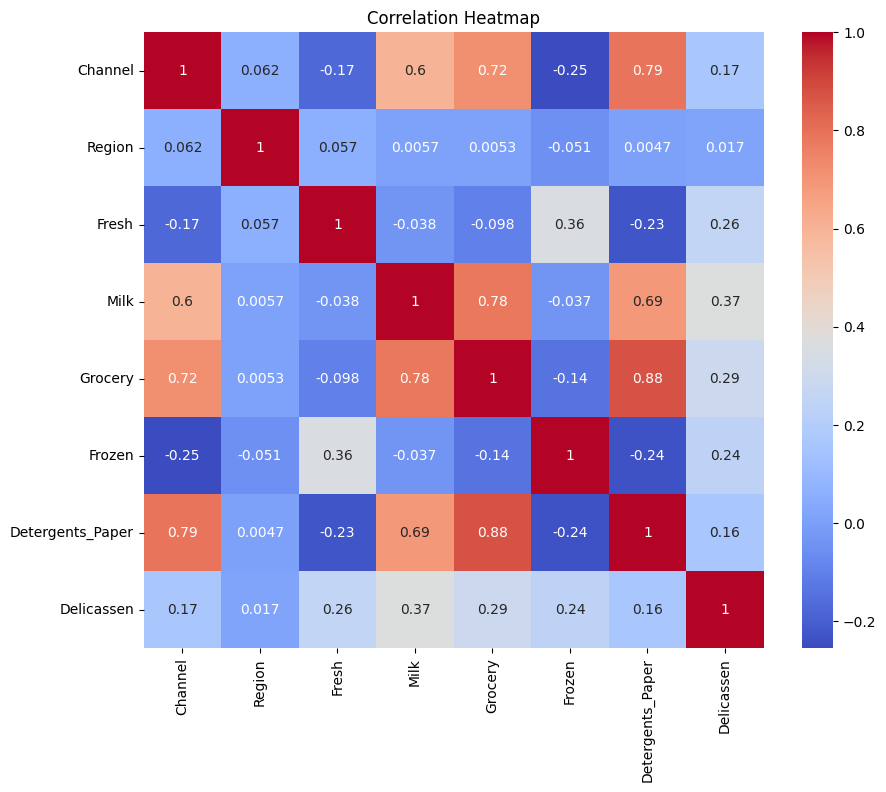

In [13]:
corr = wholesale.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Scaling**

In [14]:
scaler = StandardScaler()
wholesale_scaled = scaler.fit_transform(wholesale)
wholesale_scaled = pd.DataFrame(wholesale_scaled,columns = wholesale.columns)
wholesale_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,1.448652,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,1.448652,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,-0.690297,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.448652,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440


### **Clustering**

In [15]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(wholesale_scaled)

KMeans(n_clusters=3, random_state=42)

In [16]:
pred_cluster = k_means.predict(wholesale_scaled)

In [17]:
pred_cluster

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2,
       0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [18]:
wcss = []
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42,init="k-means++",max_iter=300,n_init=10)
  kmeans.fit(wholesale_scaled)
  wcss.append(kmeans.inertia_)


### **Elbow graph**

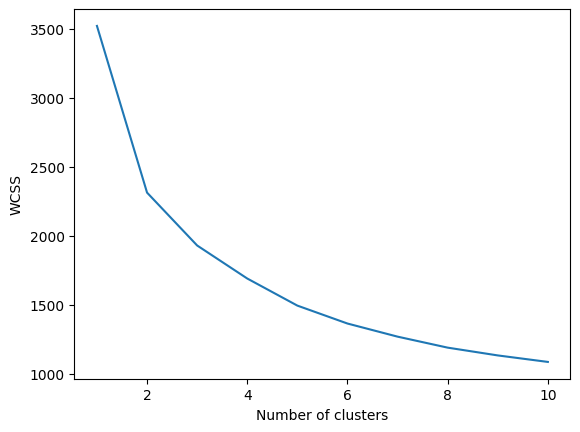

In [19]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**On looking into the elbow graph we can say that the optimal no:of cluster is 2**

### **Agglomerative CLustering**

In [20]:
agglo = AgglomerativeClustering(metric='euclidean',linkage='ward')
y_agglo = agglo.fit_predict(wholesale_scaled)
y_agglo

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

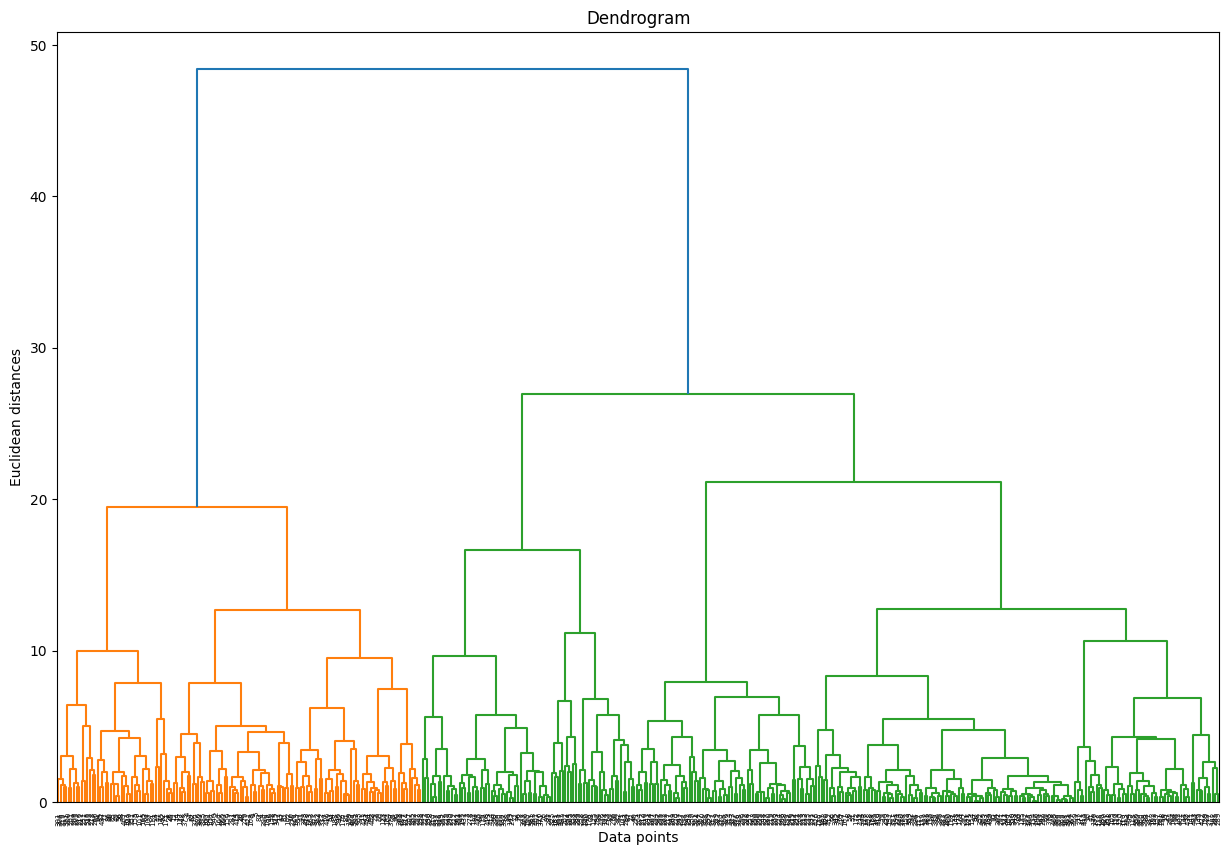

In [21]:
z=linkage(wholesale_scaled,'ward')

plt.figure(figsize=(15,10))
dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')

plt.show()

### **No:of optimal clusters is 2**